# GCN 理解教學範例
### GCN 是一個對Grapch 作運算的一種類神經網路， 當有一個　G = (V, E)則 GCN 的輸入為
* N × F⁰ 為 feature matrix X , N 為 node 數量　F⁰　為每一個 node 的 feature 的維度(數量)
* A 為N x N 的 matrix 用來表達 G 的一種相鄰矩陣 ([請參考](https://en.wikipedia.org/wiki/Adjacency_matrix))

### 在 GCN 中的每一個 hidden layer 如右 Hⁱ = f(Hⁱ⁻¹, A))
* H⁰ = X 
* f 為　propagation(feed forward) function 
* H 的為維度為 N x  Fⁱ ,  Fⁱ 為每一層的 Featrue 的維度，而最後一層的 Feature 維度就是經過GCN後對一個Node所輸出(encode)後的 feature 維度

### 最簡單的 propagation rule 如下

* f(Hⁱ, A) = σ(AHⁱWⁱ)
* Wⁱ 為 weight matrix (即是這次所要有學出的weight matrix )，其 dimession 為　Fⁱ × Fⁱ⁺¹
* σ is a non-linear activation ，例如 ReLU

### 簡單的範例如下
![image.png](https://i.imgur.com/ZDPwhWd.png)



In [1]:
import numpy as np
np.random.seed(168)

A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float
)
# 這邊 1 代表有指其它人，以有向圖來看


### 從熱力學溫度是由高往低散佈
改用被影響的觀點來看會更好理解，每一個結點會被有連接(指向)的點影響，故矩陣改用 transpose of A

In [2]:
A_T = np.transpose(A)
A_T

matrix([[0., 0., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 1., 0., 0.]])

In [3]:
# 假設 Input X 如下(即是 H⁰)
X = np.matrix(
    [(i,-1*i) for i in range(A.shape[0])], 
    dtype=float)
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [4]:
# Fist Step Propagation　
A_T * X

matrix([[ 3., -3.],
        [ 2., -2.],
        [ 4., -4.],
        [ 1., -1.]])

In [5]:
import numpy as np
a = np.matrix([[1,2],[3,4]])
b = np.matrix([[5,6],[7,8]])
np.multiply(a,b)
print(a)
print(b)
a*b

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


matrix([[19, 22],
        [43, 50]])

### 有一個問題是沒有考慮到自已對自已的影響
* 故將 A Matrix 加上單位矩陣，這樣就可以參考到自身對自己的影響力

In [6]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [7]:
A_hat = A_T + I
A_hat

matrix([[1., 0., 0., 1.],
        [1., 1., 1., 0.],
        [0., 1., 1., 1.],
        [0., 1., 0., 1.]])

In [8]:
# 這樣可就可以考慮到自身的影響
A_hat * X

matrix([[ 3., -3.],
        [ 3., -3.],
        [ 6., -6.],
        [ 4., -4.]])

### 再來是另一個大問題
* 有些的點，所被連接的數量太高

In [9]:
D = np.array(np.sum(A_hat, axis=1)).reshape(-1) # 考慮自迴圈
D = np.matrix(np.diag(D))
D

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 2.]])

In [10]:
D**-1

matrix([[0.5       , 0.        , 0.        , 0.        ],
        [0.        , 0.33333333, 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.        ],
        [0.        , 0.        , 0.        , 0.5       ]])

In [11]:
D**-1*A_hat

matrix([[0.5       , 0.        , 0.        , 0.5       ],
        [0.33333333, 0.33333333, 0.33333333, 0.        ],
        [0.        , 0.33333333, 0.33333333, 0.33333333],
        [0.        , 0.5       , 0.        , 0.5       ]])

In [12]:
D**-1*A_hat*X

matrix([[ 1.5, -1.5],
        [ 1. , -1. ],
        [ 2. , -2. ],
        [ 2. , -2. ]])

In [13]:
def relu(x): # 定義 ReLU 函數
    return np.maximum(x,0)

In [14]:
W = np.matrix([ # 定義第一層的權重
                  [1, -1],
                  [-1, 1]
            ])

In [15]:
relu(D** -1 * A_hat * X * W) # D為 A_hat 的反節點數矩陣


matrix([[3., 0.],
        [2., 0.],
        [4., 0.],
        [4., 0.]])

# 以karate_club 作為範例

In [16]:
from networkx import karate_club_graph,to_numpy_matrix  # 引用networkx套件
import networkx
zkc = karate_club_graph() # 取得俱樂部圖

Node Degree


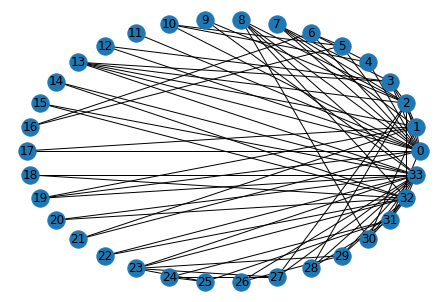

In [17]:
# import matplotlib.pyplot as plt
# import networkx as nx

# G = nx.karate_club_graph()
print("Node Degree")
# for v in zkc:
#     print('%s %s' % (v, zkc.degree(v)))

networkx.draw_circular(zkc, with_labels=True)


In [18]:
order = sorted(list(zkc.nodes())) #取得照順序排的節點
# order = [0, 1, 2, ..., 33]
A = to_numpy_matrix(zkc, nodelist=order) # 取得相鄰矩陣
A

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [19]:
I = np.eye(zkc.number_of_nodes()) # 為了自循環所定義的單位矩陣
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [20]:
A_hat = A.transpose() + I # 有自循環的相鄰矩陣
D_hat = np.array(np.sum(A_hat, 1)).reshape(-1) # 
D_hat = np.matrix(np.diag(D_hat))

In [21]:
D_hat**-1*A_hat

matrix([[0.05882353, 0.05882353, 0.05882353, ..., 0.05882353, 0.        ,
         0.        ],
        [0.1       , 0.1       , 0.1       , ..., 0.        , 0.        ,
         0.        ],
        [0.09090909, 0.09090909, 0.09090909, ..., 0.        , 0.09090909,
         0.        ],
        ...,
        [0.14285714, 0.        , 0.        , ..., 0.14285714, 0.14285714,
         0.14285714],
        [0.        , 0.        , 0.07692308, ..., 0.07692308, 0.07692308,
         0.07692308],
        [0.        , 0.        , 0.        , ..., 0.05555556, 0.05555556,
         0.05555556]])

### 假設有兩層及 weight 先給予 random
* 接下來作 feedforward 
* 過兩層
* 然視覺化出來

In [22]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

In [23]:
X = np.abs(np.random.normal(loc=0,scale=1, size=(34,2)))
# X = I

In [24]:
W_1 = np.random.normal(
    loc=0, scale=1, size=(X.shape[1], zkc.number_of_nodes())) # 維度=(節點數, 特徵數)
W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2)) # 最後要分兩群，所以維度定為(前一層特徵數, 2)

In [25]:
# Check Shape
print("X.shape",X.shape)
print("W_1.shape",W_1.shape)
print("W_2.shape",W_2.shape)
print("A_hat.shape",A_hat.shape)
print("D_hat.shape",(D_hat**-1).shape)


X.shape (34, 2)
W_1.shape (2, 34)
W_2.shape (34, 2)
A_hat.shape (34, 34)
D_hat.shape (34, 34)


In [26]:
H_1 = gcn_layer(A_hat, D_hat, X, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

In [33]:
output = H_2

### Define label's color

In [28]:
from colorhash import ColorHash
c = ColorHash('Hello World')
colors = []
for i in range(34):
    n = zkc.nodes()[i]
    colors.append(ColorHash(n['club']).hex)

## Encoding 前的的分佈


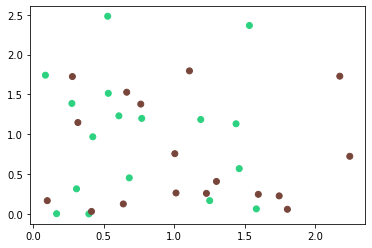

In [31]:
import matplotlib
matplotlib.pyplot.scatter(X[:,0],X[:,1], c=colors)

## 經過 Encoding 後的結果

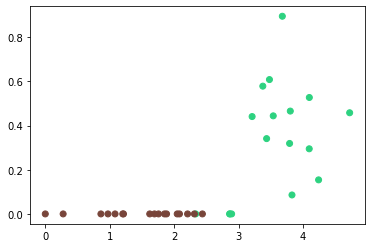

In [32]:

import matplotlib
matplotlib.pyplot.scatter(output[:,0].reshape(34).tolist()[0],output[:,1].reshape(34).tolist()[0], c=colors)

# 結論
看的出來就算 Weight 是 Random 的但是 D_hat**-1 * A_hat 最為 Filter 就已經有很強的效果了。更直白的說 Adjacent Matrix 就是已經是一個很好的 Encoder，已經可以兩個 Club 給予明顯的區隔